Распределение классов: {'0_verblyud_skulptura': 161, '18_ukrasheniya': 99, '17_gobelen_ornament_alasha': 148, '14_sedlo1': 143, '10_posuda_dlya_kumisa': 305, '19_fancy_vaza': 200, '15_sedlo2': 123, '1_barashek': 193, '13_dombri': 252, '16_kobiz_vaza_gobelen': 167, '12_sandyk1': 143, '26_berkutchi_s_ptichey': 140, '27_turksib': 124, '25_voylok_na_kruge_abstract': 192, '20_yarkiy_gobelen_ledi': 195, '21_mujchina_s_mechom': 160, '23_revolyuchiya_v_aule': 60, '24_dekorativniyi_vazi_vmeste': 237, '29_vesna_jaylau_zagatovka_productov': 119, '22_jambyl': 149, '28_shokan_sidit': 137, '33_medeu': 60, '36_gobelen_derevo': 252, '30_senokos': 138, '34_ges': 60, '2_tri_skulpturi_s_sharami': 303, '35_vitrina_s_ukrasheniyami': 60, '31_gori_i_voda': 55, '38_gobelen_krasniy': 60, '32_mujchina_s_gazetoy': 58, '48_Mullashev_triptih': 186, '40_Abishev_klich': 112, '3_chernaya_vaza': 162, '41_Aytbayev_schaste': 157, '45_Esirkeev_zvuki_kobiza': 146, '43_Dosmogambetov_Suleymenov': 103, '44_Esenbayev_Saule': 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/300
346/346 ━━━━━━━━━━━━━━━━━━━━ 2339s 7s/step - accuracy: 0.5759 - loss: 2.7564 - val_accuracy: 0.9890 - val_loss: 0.7641 - learning_rate: 2.0000e-04
Epoch 2/300
346/346 ━━━━━━━━━━━━━━━━━━━━ 185s 533ms/step - accuracy: 0.9872 - loss: 0.7613 - val_accuracy: 0.9919 - val_loss: 0.5467 - learning_rate: 2.0000e-04
Epoch 3/300
346/346 ━━━━━━━━━━━━━━━━━━━━ 188s 544ms/step - accuracy: 0.9954 - loss: 0.5135 - val_accuracy: 0.9904 - val_loss: 0.3871 - learning_rate: 2.0000e-04
Epoch 4/300
346/346 ━━━━━━━━━━━━━━━━━━━━ 186s 539ms/step - accuracy: 0.9944 - loss: 0.3742 - val_accuracy: 0.9912 - val_loss: 0.2933 - learning_rate: 2.0000e-04
Epoch 5/300
346/346 ━━━━━━━━━━━━━━━━━━━━ 180s 520ms/step - accuracy: 0.9969 - loss: 0.2745 - val_accuracy: 0.9949 - val_loss: 0.2152 - learning_rate: 2.0000e-04
Epoch 6/300
346/346 ━━━━━━━━━━━━━━━━━━━━ 179s 516ms/step - accuracy: 0.9963 - loss: 0.2213 - val_accuracy: 0.9904 - val_loss: 0.1997 - learning_rate: 2.0000e-04
Epoch 7/300
346/346 ━━━━━━━━━━━━━━━━

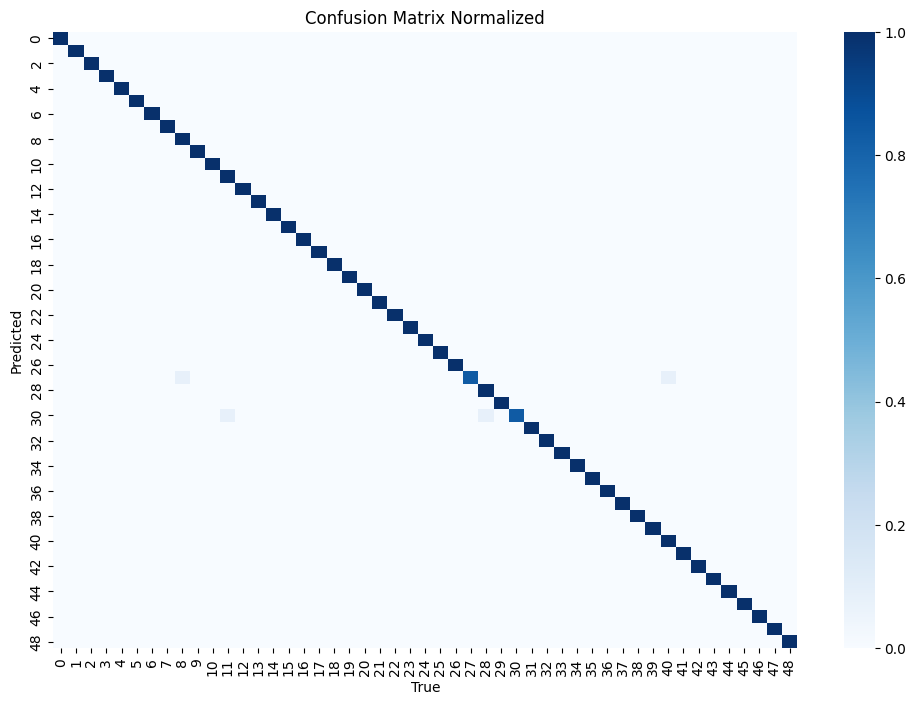

                                     precision    recall  f1-score   support

               0_verblyud_skulptura       1.00      1.00      1.00        32
              10_posuda_dlya_kumisa       1.00      1.00      1.00        61
                         12_sandyk1       1.00      1.00      1.00        28
                          13_dombri       1.00      1.00      1.00        50
                          14_sedlo1       1.00      1.00      1.00        28
                          15_sedlo2       1.00      1.00      1.00        24
              16_kobiz_vaza_gobelen       1.00      1.00      1.00        33
         17_gobelen_ornament_alasha       1.00      1.00      1.00        29
                     18_ukrasheniya       0.95      1.00      0.97        19
                      19_fancy_vaza       1.00      1.00      1.00        40
                         1_barashek       1.00      1.00      1.00        38
             20_yarkiy_gobelen_ledi       0.97      1.00      0.99        3

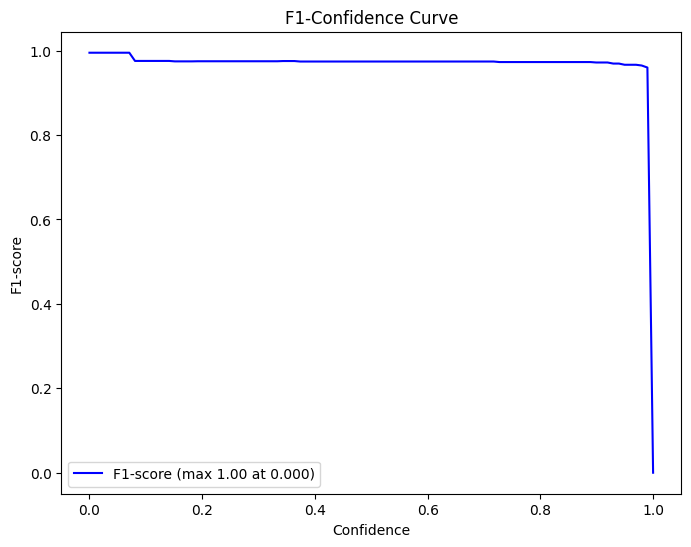

Mean Average Precision at IoU=0.5: 1.0000
Mean Average Precision at IoU=0.5:0.95: 1.0000


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, f1_score

# Параметры
batch_size = 16
img_size = (224, 224)
epochs = 300
data_path = "/content/drive/MyDrive/yolo/croped_dataset_train"

# Проверка и балансировка классов
class_counts = {class_name: len(os.listdir(os.path.join(data_path, class_name)))
                for class_name in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, class_name))}
print("Распределение классов:", class_counts)

# Генерация данных с аугментацией
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    shuffle=False
)

num_classes = len(train_generator.class_indices)

# Создание модели MobileNetV3Small
base_model = ResNet50V2(include_top=False, input_shape=(img_size[0], img_size[1], 3), weights='imagenet')
base_model.trainable = True

for layer in base_model.layers[:-50]:  # Размораживаем верхние 50 слоев
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.8),
    layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.01))
])

model.compile(
    optimizer=Adam(learning_rate=2e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

# Обучение модели
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[reduce_lr, early_stopping]
)

# Классы и индексы
class_indices = train_generator.class_indices
inverted_class_indices = {v: k for k, v in class_indices.items()}

# Сохранение модели
keras_model_path = "/content/drive/MyDrive/yolo/models/ResNet/ResNet50V2.keras"
model.save(keras_model_path)
print(f"Модель сохранена в формате Keras: {keras_model_path}")

# Конвертация модели в TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
#converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Оптимизация модели
tflite_model = converter.convert()

# Сохранение TFLite модели
tflite_model_path = "/content/drive/MyDrive/yolo/models/ResNet/ResNet50V2.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print(f"Модель успешно сохранена в формате TFLite: {tflite_model_path}")

# Вычисление метрик на валидационном наборе
y_true = validation_generator.classes
y_pred_probs = model.predict(validation_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix (нормализованная)
cm = confusion_matrix(y_true, y_pred, normalize='true')
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title("Confusion Matrix Normalized")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# Precision, Recall, F1-score
report = classification_report(y_true, y_pred, target_names=list(class_indices.keys()))
print(report)

# F1-Confidence Curve
confidence_levels = np.linspace(0, 1, 100)
f1_scores = []

for conf in confidence_levels:
    filtered_preds = np.where(y_pred_probs.max(axis=1) >= conf, y_pred, -1)
    f1 = f1_score(y_true, filtered_preds, average='macro', zero_division=0)
    f1_scores.append(f1)

plt.figure(figsize=(8, 6))
plt.plot(confidence_levels, f1_scores, label=f'F1-score (max {max(f1_scores):.2f} at {confidence_levels[np.argmax(f1_scores)]:.3f})', color='blue')
plt.xlabel("Confidence")
plt.ylabel("F1-score")
plt.title("F1-Confidence Curve")
plt.legend()
plt.show()

# Mean Average Precision at IoU=0.5 и IoU=0.5:0.95
average_precisions = []
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(y_true == i, y_pred_probs[:, i])
    ap = average_precision_score(y_true == i, y_pred_probs[:, i])
    average_precisions.append(ap)

map_50 = np.mean(average_precisions)
map_50_95 = np.mean([ap for ap in average_precisions if ap > 0.05])  # Исключаем слишком малые значения

print(f"Mean Average Precision at IoU=0.5: {map_50:.4f}")
print(f"Mean Average Precision at IoU=0.5:0.95: {map_50_95:.4f}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
